In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('../data/OnlineRetail.csv', encoding='latin1', parse_dates=['InvoiceDate'])

In [3]:
def first_looking(df):
    print("Shape of the DataFrame:\n", df.shape,'\n')
    print("--------------------------------\n")
    print("Columns in the DataFrame:\n", df.columns.tolist(),'\n')
    print("--------------------------------\n")
    print("Data types of each column:\n", df.dtypes,'\n')
    print("--------------------------------\n")
    print("First 5 rows of the DataFrame:\n", df.head(),'\n')
    print("--------------------------------\n")
    print("Last 5 rows of the DataFrame:\n", df.tail(),'\n')
    print("--------------------------------\n")
    print("Missing values in each column:\n", df.isnull().sum(),'\n')
    print("--------------------------------\n")
    print("Descriptive statistics:\n", df.describe(),'\n')
    print("--------------------------------\n")
    print("Unique values:\n", df.nunique(),'\n')
    print("--------------------------------\n")
    for col in df.columns:
            if df[col].dtype != 'object' and df[col].dtype != 'datetime64[ns]':
                print("column name    : ", col)
                print("num_of_zeros   : ", (df[col] == 0).sum())
                print("num_of_negatives: ", (df[col] < 0).sum())
                print("median_value   : ", df[col].median(),'\n')
                print("--------------------------------\n")
        

In [4]:
first_looking(df)

Shape of the DataFrame:
 (541909, 8) 

--------------------------------

Columns in the DataFrame:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'] 

--------------------------------

Data types of each column:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object 

--------------------------------

First 5 rows of the DataFrame:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE W

In [5]:
df.drop_duplicates(inplace = True)
print("Shape of the DataFrame after dropping duplicates:\n", df.shape,'\n')
print("--------------------------------\n")
df.dropna(subset = ['CustomerID'], inplace = True)
print("Shape of the DataFrame after dropping rows with missing CustomerID:\n", df.shape,'\n')
print("--------------------------------\n")
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print("Shape of the DataFrame after filtering out negative quantities and prices:\n", df.shape,'\n')

Shape of the DataFrame after dropping duplicates:
 (536641, 8) 

--------------------------------

Shape of the DataFrame after dropping rows with missing CustomerID:
 (401604, 8) 

--------------------------------

Shape of the DataFrame after filtering out negative quantities and prices:
 (392692, 8) 



In [6]:
first_looking(df)

Shape of the DataFrame:
 (392692, 8) 

--------------------------------

Columns in the DataFrame:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'] 

--------------------------------

Data types of each column:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object 

--------------------------------

First 5 rows of the DataFrame:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE W

In [7]:
# Outlier exploration

cols = ['Quantity', 'UnitPrice']
outlier_dfs = []

for col in cols:
    df[col] = df[col].astype(float)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_dfs.append(iqr_outliers)
    print(f"Outliers in {col}:\n", iqr_outliers, '\nNumber of outliers:', len(iqr_outliers), '\nPercentage of outliers' , len(iqr_outliers)/len(df[col]) * 100,'%' , '\n')

final_outliers = pd.concat(outlier_dfs, axis=1).drop_duplicates()
final_outliers.describe(include='all')

Outliers in Quantity:
 9         32.0
31        48.0
44        36.0
46        80.0
65        32.0
          ... 
541835    40.0
541865    40.0
541866    36.0
541867    72.0
541868    48.0
Name: Quantity, Length: 25616, dtype: float64 
Number of outliers: 25616 
Percentage of outliers 6.523178470658938 % 

Outliers in UnitPrice:
 5          7.65
16         9.95
19         7.95
20         7.95
45        18.00
          ...  
541768    18.00
541786    11.95
541831     8.50
541849     9.95
541892     8.95
Name: UnitPrice, Length: 34112, dtype: float64 
Number of outliers: 34112 
Percentage of outliers 8.686706120827518 % 



,Quantity,UnitPrice
count,387.000000,279.000000
mean,828.268734,249.598065
std,5585.138016,730.489706
min,28.000000,7.620000
25%,60.000000,9.290000
50%,152.000000,13.160000
75%,508.000000,131.690000
max,80995.000000,8142.750000


In [8]:
print(final_outliers['Quantity'].sort_values(ascending=False).head(50))

540421    80995.0
61619     74215.0
421632     4800.0
206121     4300.0
97432      3906.0
270885     3186.0
52711      3114.0
433788     3000.0
4945       2880.0
201149     2700.0
80742      2592.0
32671      2400.0
125282     2160.0
437480     2100.0
511421     2040.0
52710      2000.0
424310     1992.0
348317     1944.0
52709      1930.0
291247     1900.0
348316     1878.0
4850       1824.0
347563     1788.0
25920      1728.0
221722     1600.0
376061     1540.0
223446     1515.0
90259      1500.0
19871      1488.0
6365       1440.0
348322     1428.0
348325     1412.0
533812     1404.0
4946       1400.0
19980      1394.0
52133      1356.0
185919     1350.0
52771      1300.0
40060      1296.0
52134      1284.0
82205      1200.0
99936      1152.0
520003     1120.0
89284      1056.0
437478     1020.0
52132      1010.0
16435      1008.0
19149      1000.0
437471      992.0
16427       972.0
Name: Quantity, dtype: float64


In [9]:
print(final_outliers['UnitPrice'].sort_values(ascending=False).head(50))

173382    8142.75
422351    4161.06
406406    3949.32
374542    3155.95
297438    2500.00
144826    2382.92
406407    2118.74
144829    2053.07
343000    2033.10
150615    1867.86
117054    1687.17
528082    1599.26
508459    1526.76
467436    1500.36
494728    1270.06
144828    1252.95
200745    1241.98
145831    1136.30
455261     908.16
429588     901.58
350599     878.55
323876     852.80
468046     850.50
401766     743.62
236402     700.00
361584     688.08
222680     649.50
222682     649.50
416463     638.30
389983     635.01
242907     600.00
398150     599.50
188277     557.72
264976     550.94
268399     550.64
455621     549.34
187584     523.00
372766     490.25
414251     464.90
271252     451.42
455620     424.06
171468     400.00
249272     389.68
106398     376.50
142988     350.00
400625     339.02
182482     334.71
96678      320.69
153345     308.82
485574     300.00
Name: UnitPrice, dtype: float64


In [10]:
outlier_indices = final_outliers.index
df_withoyt_outliers = df.drop(index=outlier_indices)
print("Shape of the DataFrame after removing outliers:\n", df_withoyt_outliers.shape, '\n')

Shape of the DataFrame after removing outliers:
 (392141, 8) 



In [11]:
df['Total'] = df['Quantity'] * df['UnitPrice']

<Axes: xlabel='StockCode'>

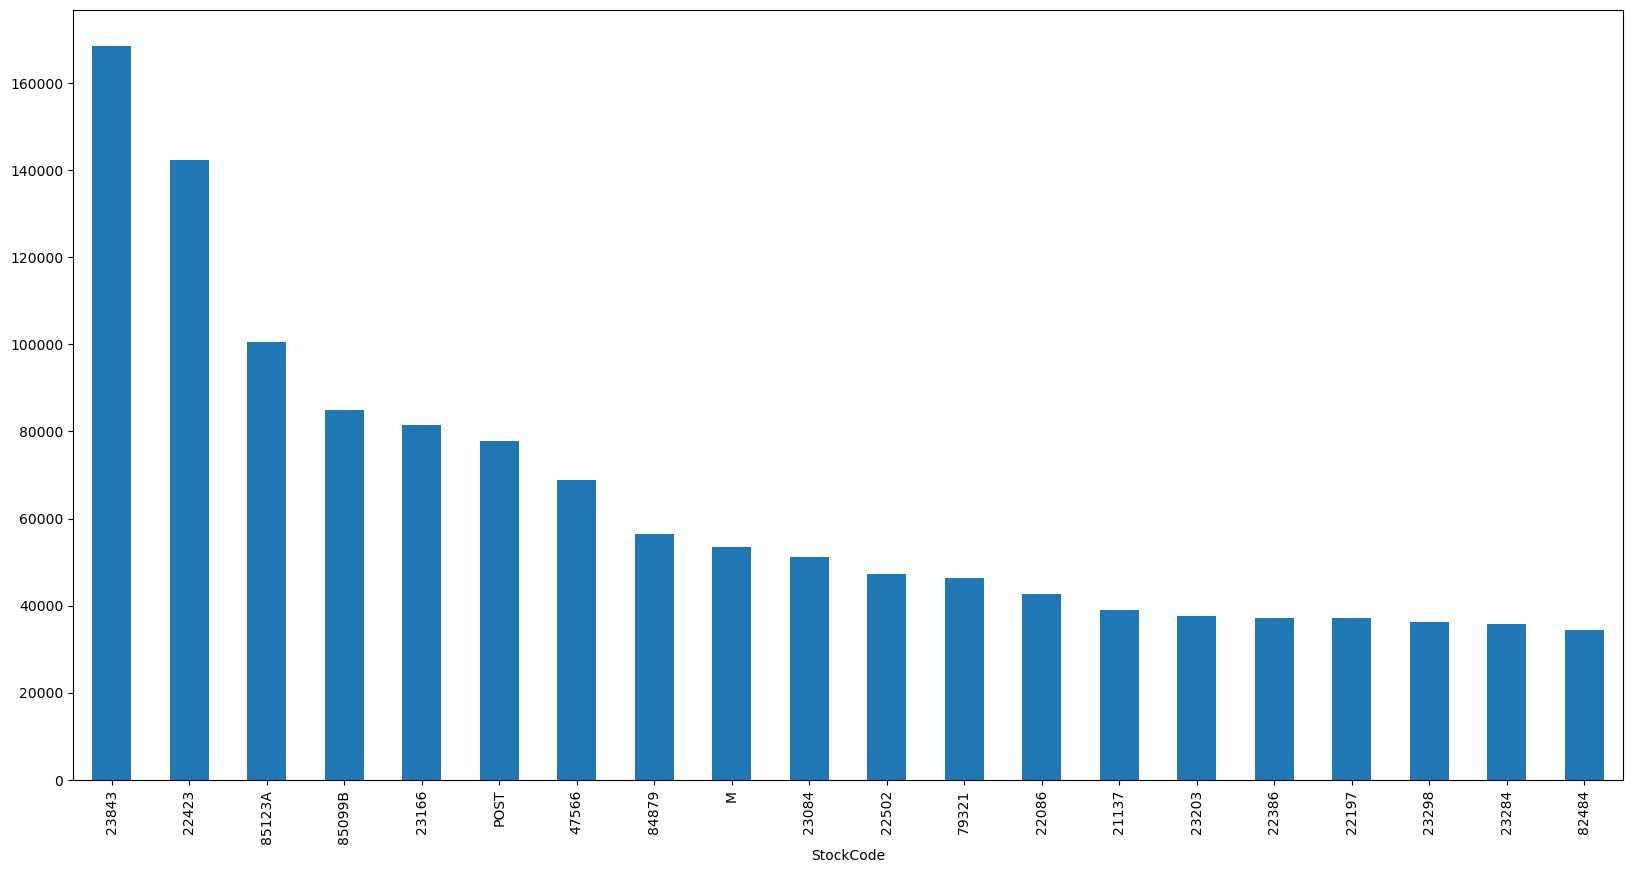

In [12]:
top_products = df.groupby('StockCode')['Total'].sum()
top_20_products = top_products.sort_values(ascending=False).head(20)

top_20_products.plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='Country'>

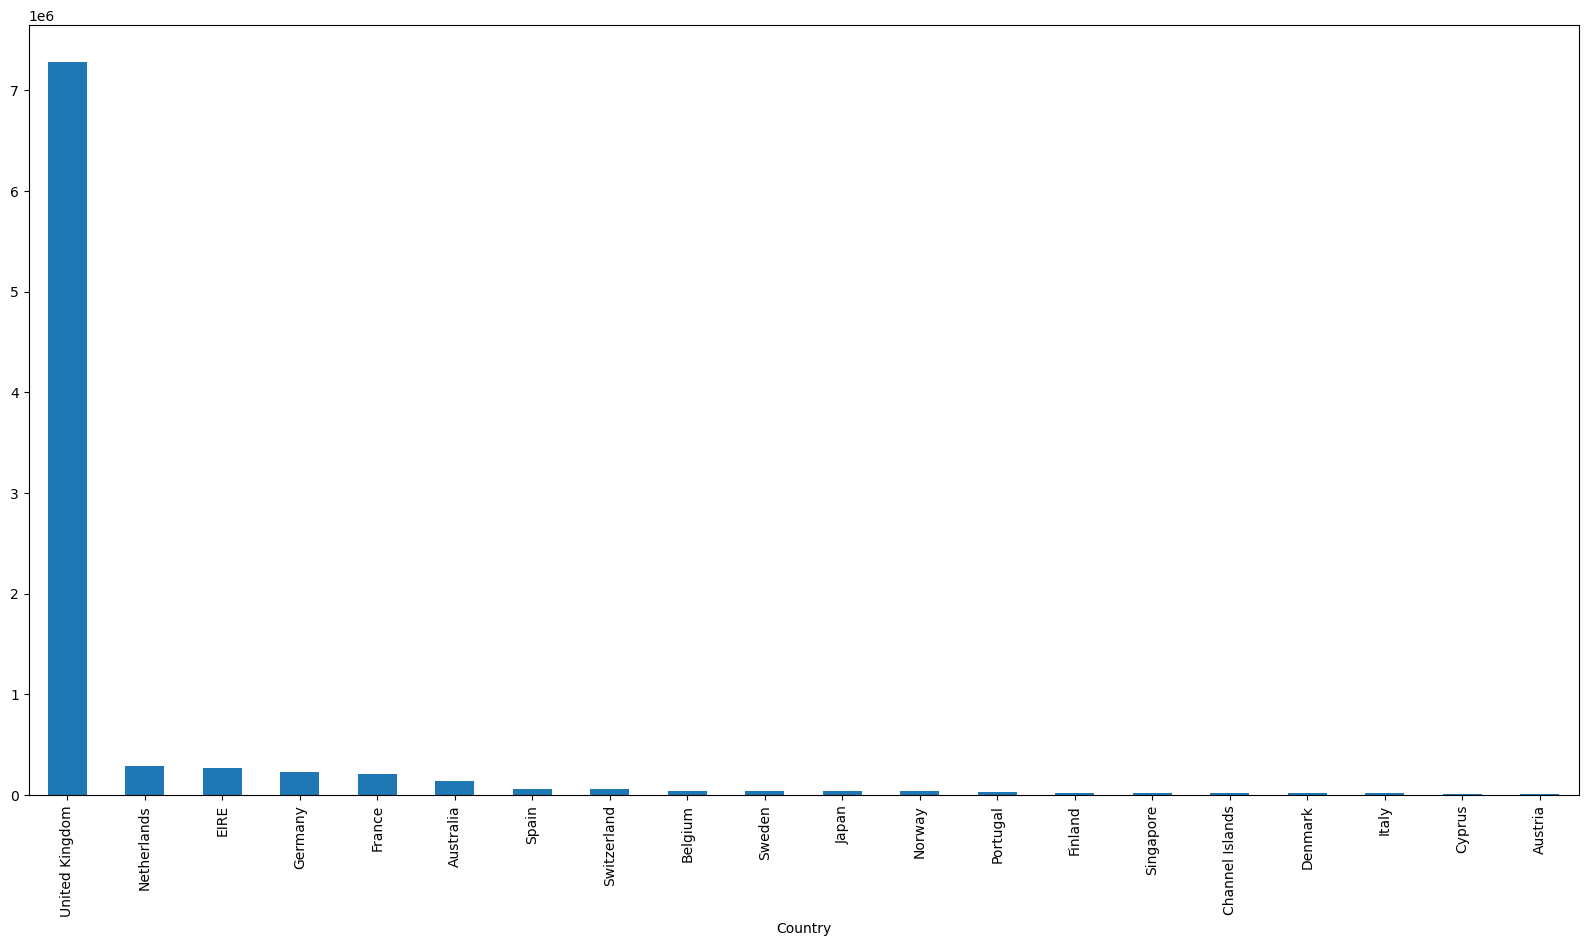

In [13]:
top_countries = df.groupby('Country')['Total'].sum().sort_values(ascending=False).head(20)
top_countries.plot(kind='bar', figsize=(20, 10))

In [14]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceWeek'] = df['InvoiceDate'].dt.isocalendar().week
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.dayofweek + 1

<Axes: title={'center': 'Monthly Sales'}, xlabel='InvoiceMonth'>

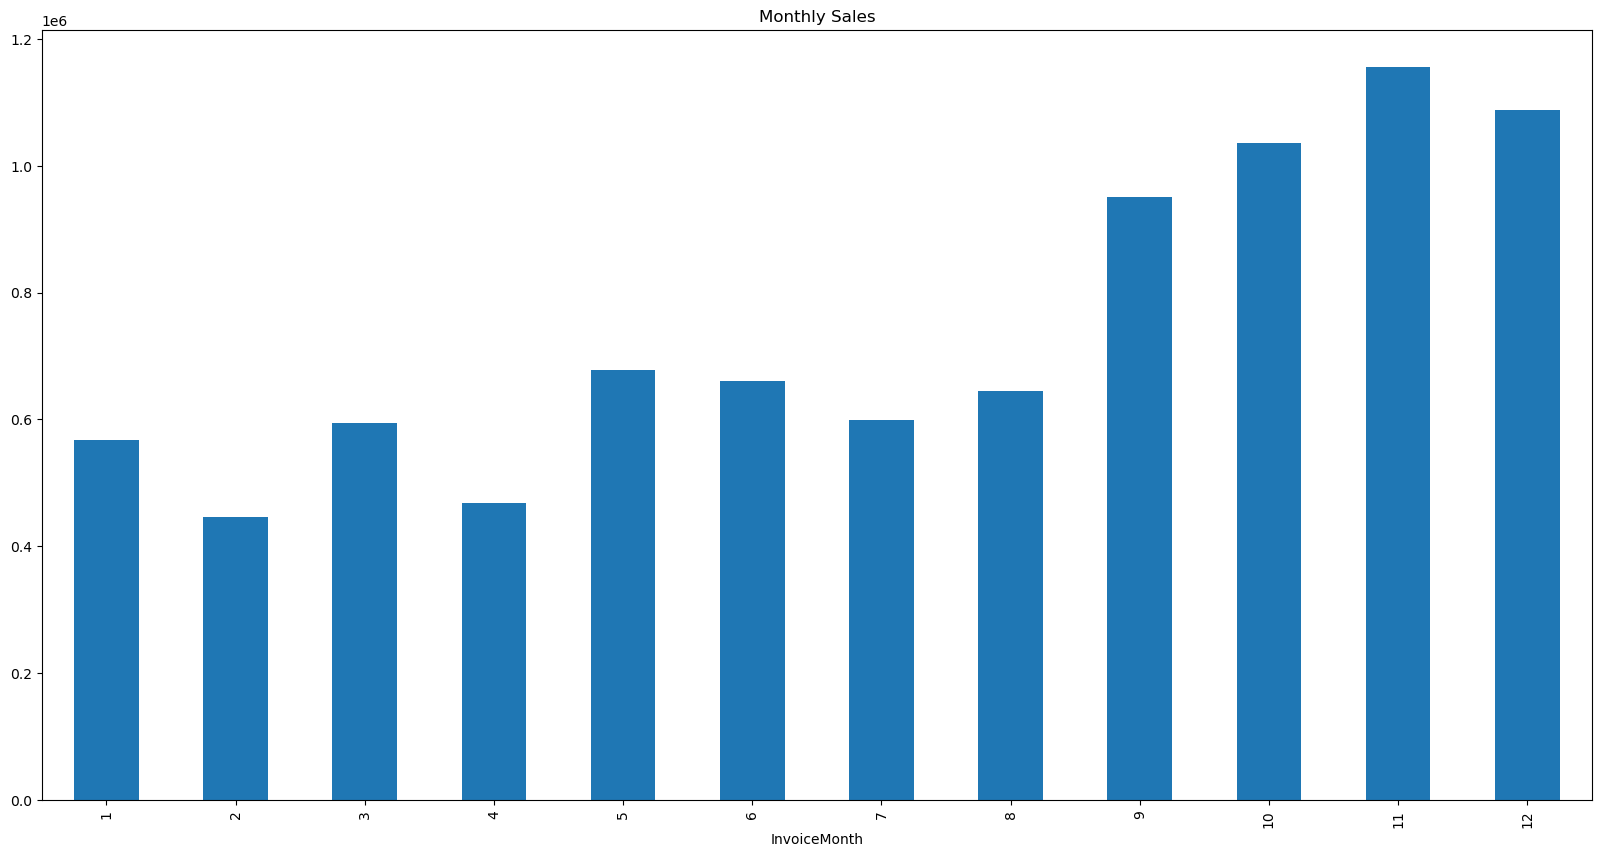

In [15]:
monthly_sales = df.groupby(df['InvoiceMonth'])['Total'].sum()
monthly_sales.sort_index(inplace=True)
monthly_sales.plot(kind='bar', figsize=(20, 10), title='Monthly Sales')

<Axes: title={'center': 'Yearly Sales'}, xlabel='InvoiceYear'>

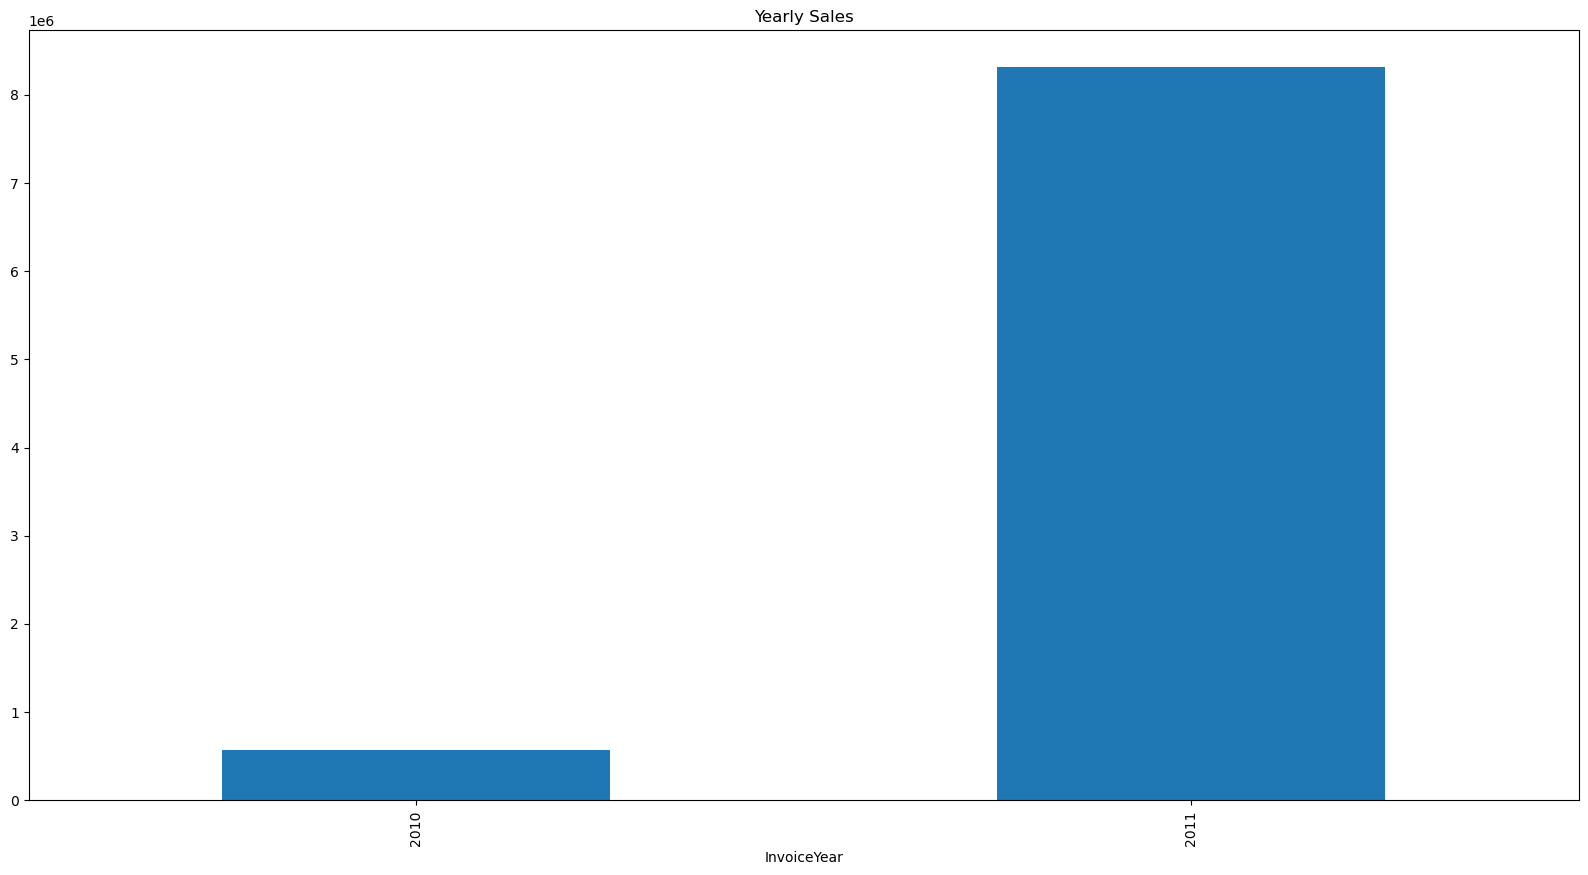

In [16]:
yearly_sales = df.groupby(df['InvoiceYear'])['Total'].sum()
yearly_sales.plot(kind='bar', figsize=(20, 10), title='Yearly Sales')

<Axes: title={'center': 'Daily Sales'}, xlabel='InvoiceDay'>

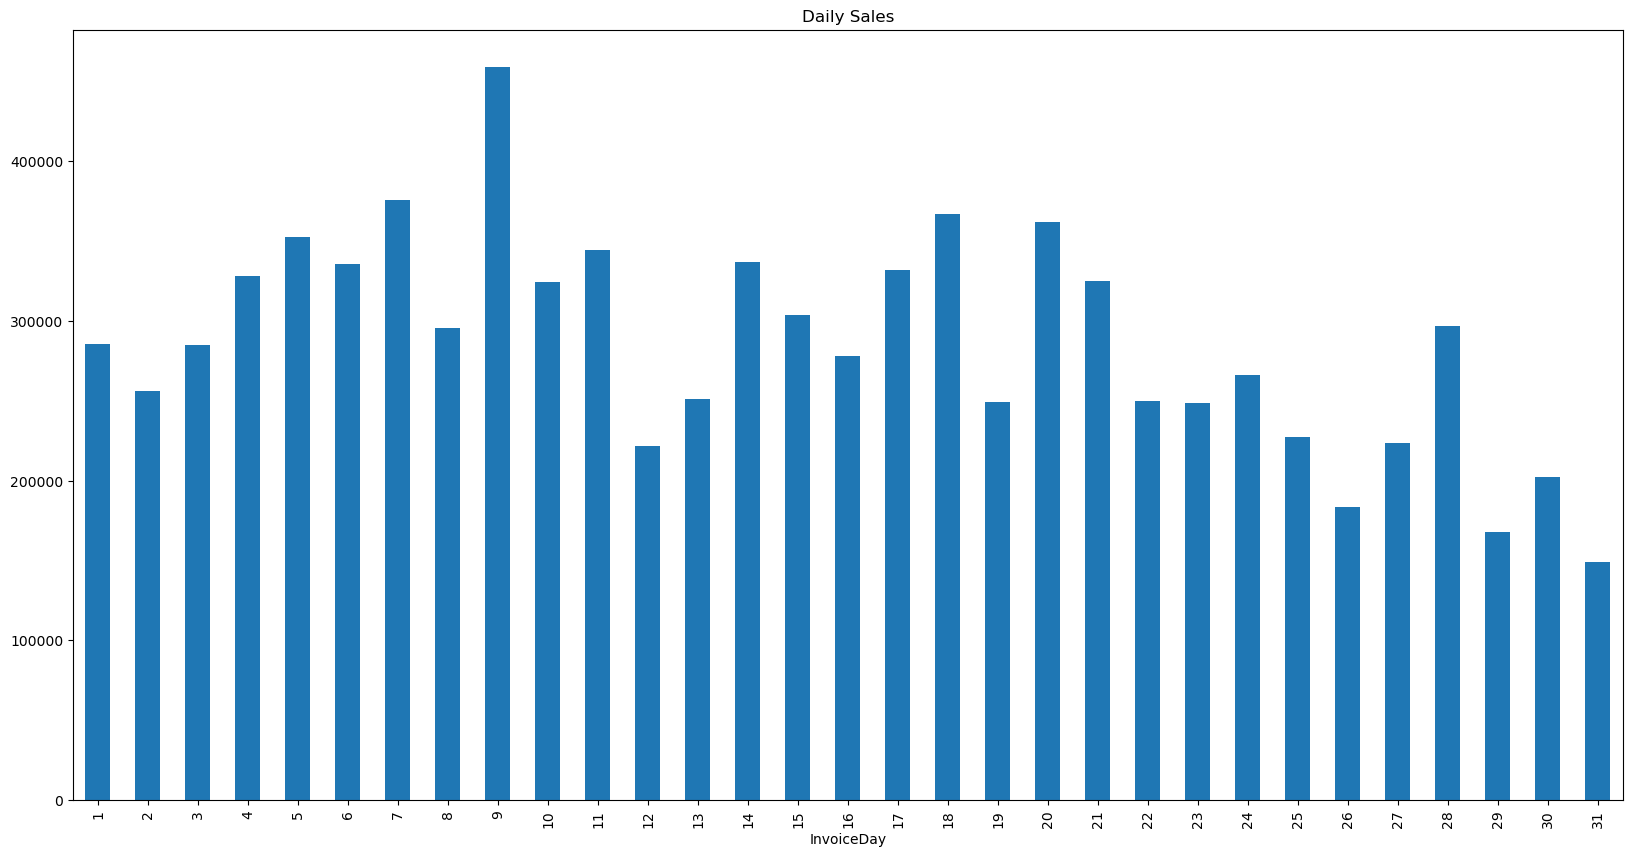

In [17]:
dayly_sales = df.groupby(df['InvoiceDay'])['Total'].sum()
dayly_sales.plot(kind='bar', figsize=(20, 10), title='Daily Sales')

<Axes: title={'center': 'Weekly Sales'}, xlabel='InvoiceWeek'>

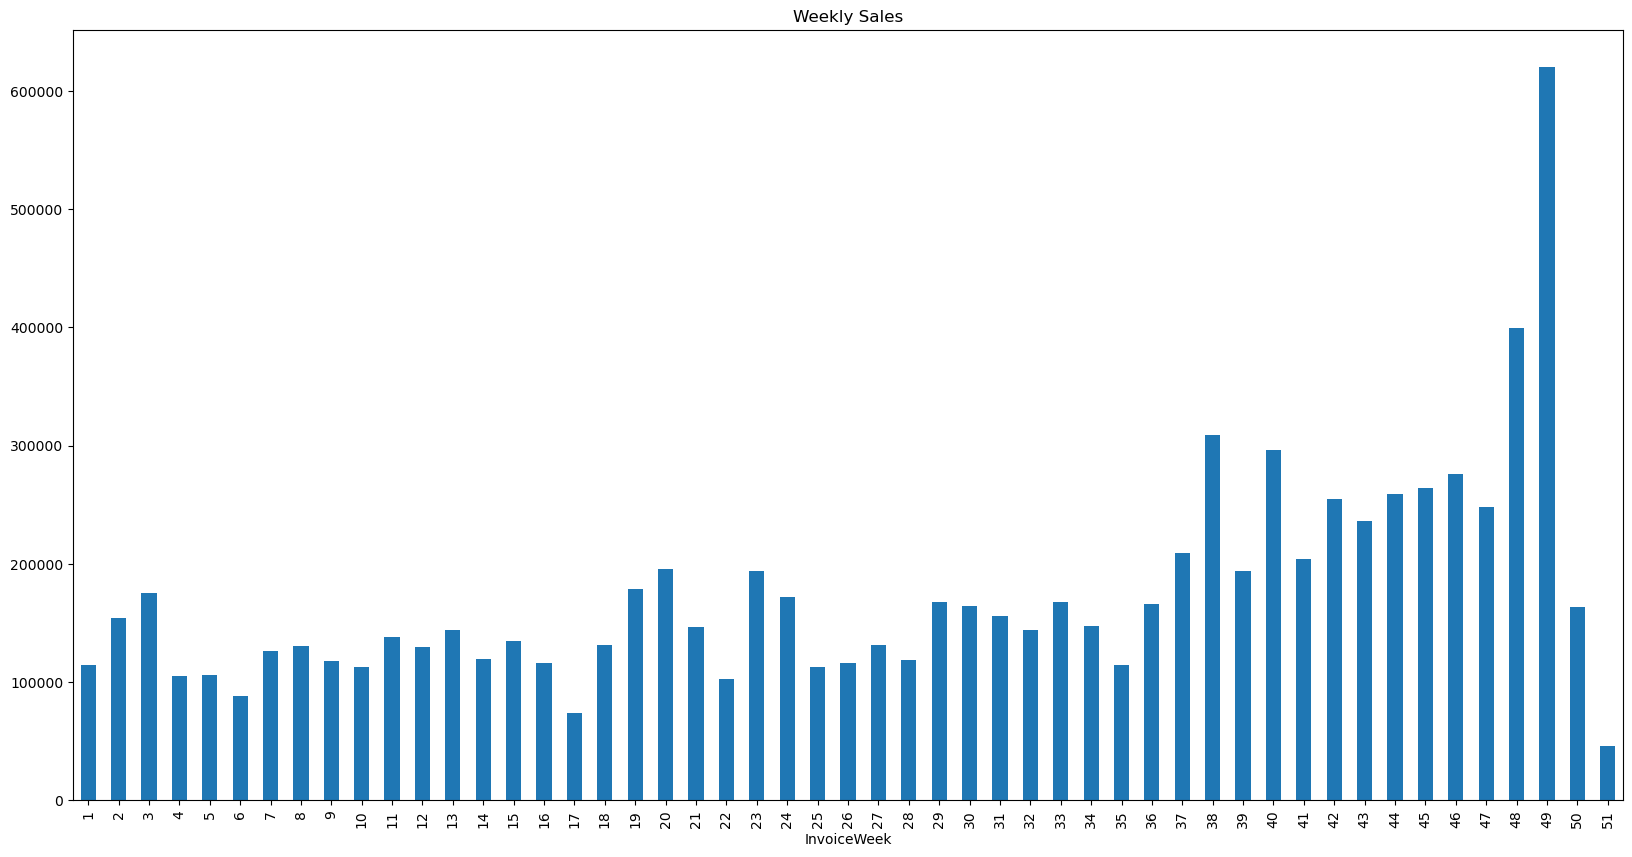

In [18]:
weekly_sales = df.groupby(df['InvoiceWeek'])['Total'].sum()
weekly_sales.plot(kind='bar', figsize=(20, 10), title='Weekly Sales')

<Axes: title={'center': 'Sales by Day of Week'}, xlabel='InvoiceDayOfWeek'>

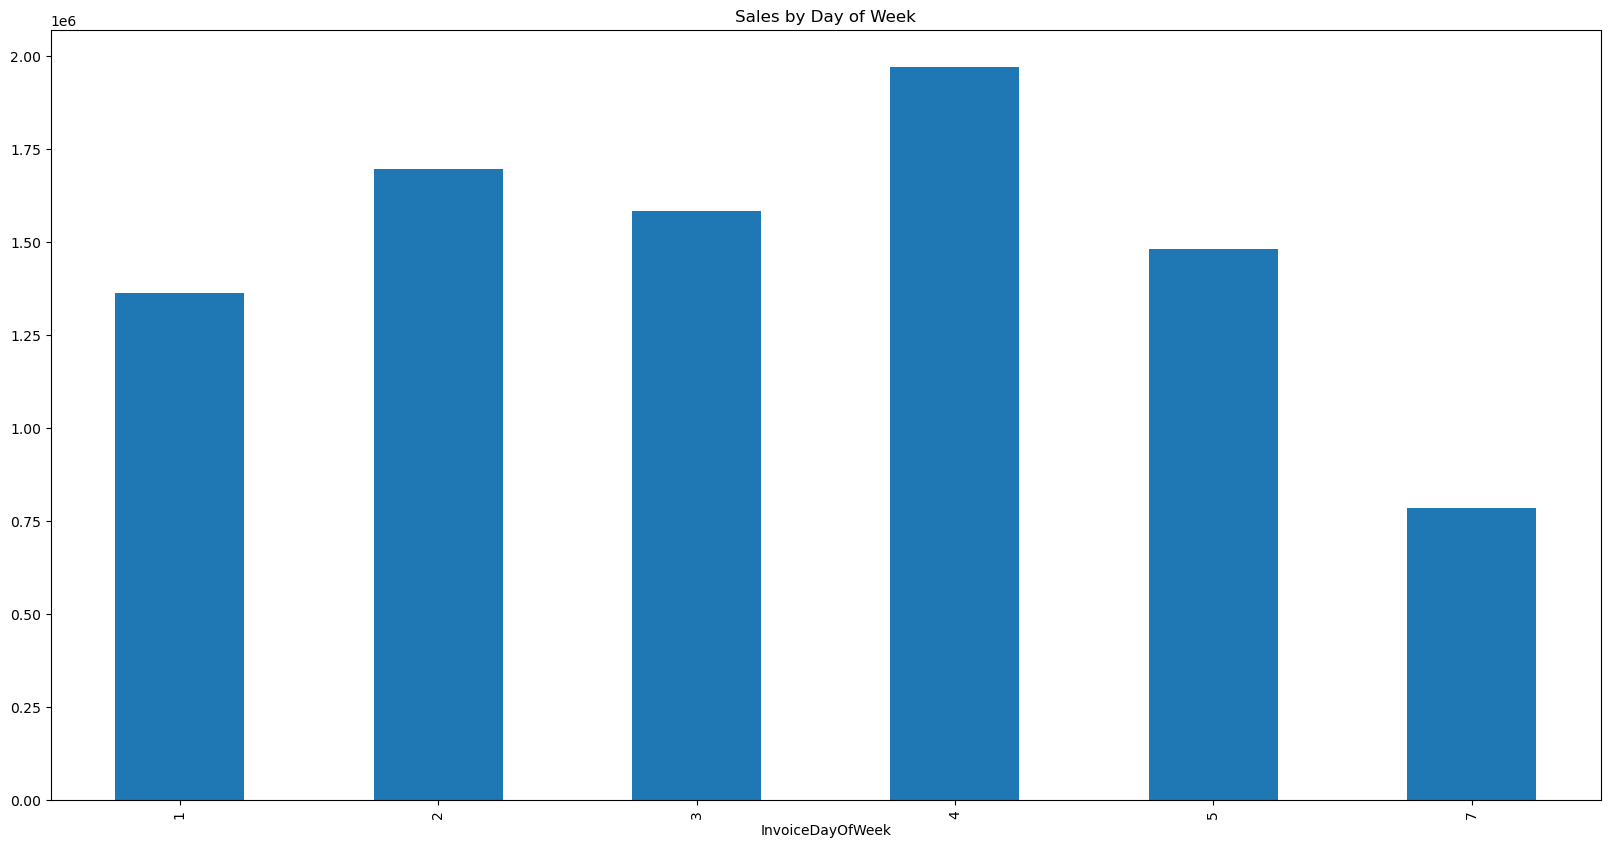

In [19]:
day_of_week_sales = df.groupby(df['InvoiceDayOfWeek'])['Total'].sum()
day_of_week_sales.plot(kind='bar', figsize=(20, 10), title='Sales by Day of Week')

In [20]:
df.to_csv('../data/cleaned_data.csv', index = False) # Save the cleaned DataFrame to a CSV file
df_withoyt_outliers.to_csv('../data/cleaned_data_without_outliers.csv', index = False) # Save the DataFrame without outliers to a CSV file